Text(0, 0.5, 'Counts')

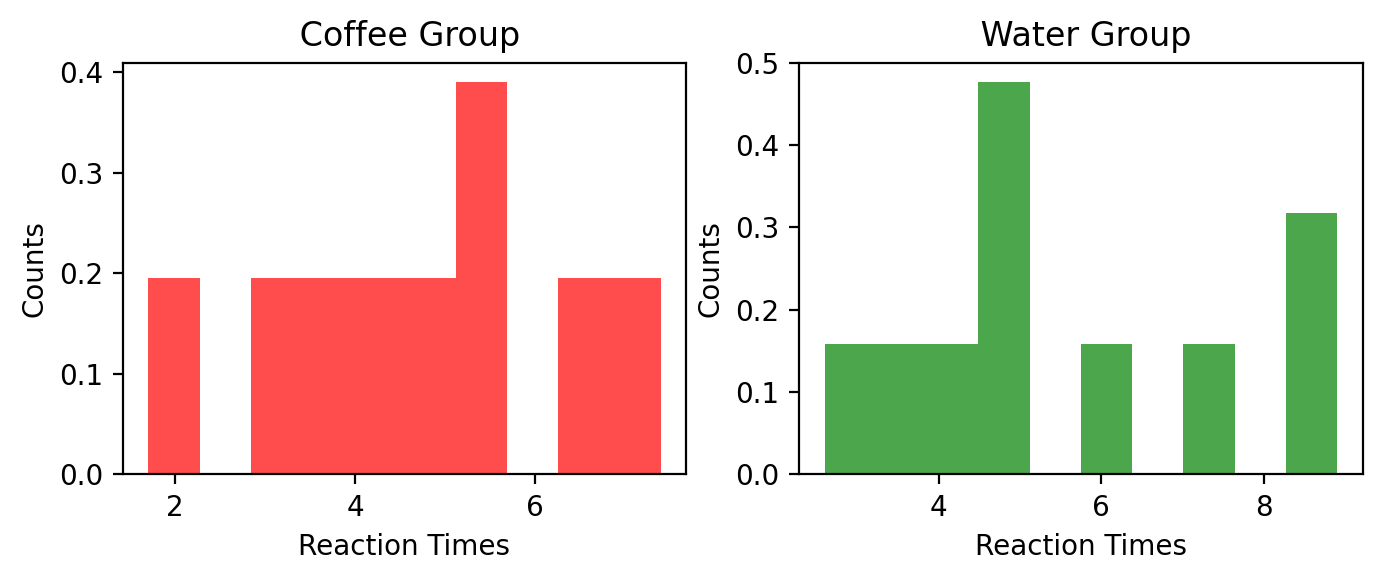

In [3]:
Sample_C=np.array([3.7,4.9,5.2,6.3,7.4,4.4,5.3,1.7,2.9])   #Construct two sample from the table above
Sample_W=np.array([4.5,5.1,6.2,7.3,8.7,4.2,3.3,8.9,2.6,4.8])

fig = plt.figure(figsize=(8, 6), dpi=200)  #Generate blank figure layout is 2 x 2, size 8 inch  x 6 inch, 200 dpi
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)

ax1.hist(Sample_C, 10, density = 1, 
                            color ='red',
                            alpha = 0.7) #Generate relative frequency histogram for coffee group
ax1.set_title(' Coffee Group')
ax1.set_xlabel('Reaction Times')
ax1.set_ylabel('Counts')
ax2.hist(Sample_W, 10, density = 1, 
                            color ='Green',
                            alpha = 0.7) #Generate relative frequency histogram for water group
ax2.set_title(' Water Group')
ax2.set_xlabel('Reaction Times')
ax2.set_ylabel('Counts')

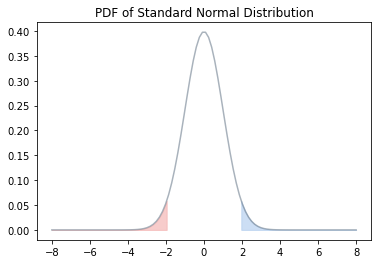

In [14]:
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats as sts

#Compute the sum of ranks for each sample
Mix_Sample=np.concatenate((Sample_C, Sample_W)) #merge two samples into a sample by np.concatenate()
Rank_loc_info=Mix_Sample.argsort() #sort the sample value from small to large
Rank_Plus_1=0
Rank_Plus_2=0
for i in range(0,len(Mix_Sample)):
    if Mix_Sample[Rank_loc_info[i]] in Sample_C:
        Rank_Plus_1=Rank_Plus_1+(i+1) #sum up the rank for sample C
    else:
        Rank_Plus_2=Rank_Plus_2+(i+1) #sum up the rank for sample W
#Compute parameters U_1 and U_2
U_1=9*10+(9*10/2)-Rank_Plus_1
U_2=9*10+(10*11/2)-Rank_Plus_2

#Compute test statistic
U=np.minimum(U_1,U_2)
test_stat= (U - 10*9/2)/(np.sqrt(9*10*(9+10+1)/12))
#print('The test statistic is', test_stat)


#Visualise critical region  
x = np.linspace(-8, 8, 100)#Return evenly spaced numbers over a specified interval between -8 and 8.
plt.plot(x, sts.norm.pdf(x,loc=0, scale=1), 'slategrey', alpha=0.6)  #Generate PDF of standard normal distribution
plt.title('PDF of Standard Normal Distribution')
plt.ylabel('f(x)')
plt.xlabel('x')

C_value_L=sts.norm.ppf(0.025, loc=0, scale=1) #Compute lower critical value by using the inverse function of cdf of standard normal distribution
#print('The lower critical value is', C_value_L)
x2= np.linspace(-8,C_value_L, 100) #Return evenly spaced numbers over a specified interval between -8 and lower critical value.
plt.fill_between(x2, sts.norm.pdf(x2,loc=0, scale=1), color='#F2ABA9',alpha=0.6)

C_value_U=sts.norm.ppf(0.975, loc=0, scale=1)#Compute upper critical value by using the inverse function of cdf of standard normal distribution
#print('The upper critical value is', C_value_U)
x3= np.linspace(C_value_U,8, 100) #Return evenly spaced numbers over a specified interval between upper critical value and 8.
plt.fill_between(x3, sts.norm.pdf(x3,loc=0, scale=1), color='#ABC9ED',alpha=0.6)

plt.ylabel(None)
plt.xlabel(None)
plt.savefig('wmwu-test.jpg', dpi=3000) 

#plt.annotate('Lower Critical Value -1.960',(C_value_L,0),(C_value_L-6.5,0.15),arrowprops=dict(arrowstyle="fancy",
                            #fc="0.6", ec="none",
                            #connectionstyle="angle3,angleA=0,angleB=-90"))

#plt.annotate('Upper Critical Value 1.960',(C_value_U,0),(C_value_U+0.5,0.15),arrowprops=dict(arrowstyle="fancy",
                            #fc="0.6", ec="none",
                            #connectionstyle="angle3,angleA=0,angleB=-90"))

#plt.annotate('Test Statistic -0.572',(test_stat,0),(test_stat+1,0.05),arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.4))
#print('The test statistic is not in the critical region, null hypothesis is retained ')
plt.show()

